In [1]:
# I import libraries that I will use.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# For preparing
import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

In [3]:
with open('content/annotations/maksssksksss0.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

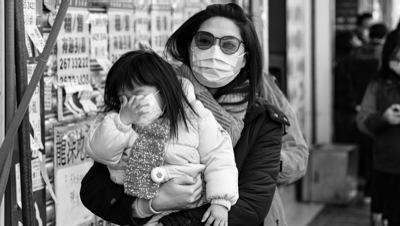

In [4]:
# creating a image1 object
im1 = Image.open(r"content/images/maksssksksss100.png")
 
# applying grayscale method
im2 = ImageOps.grayscale(im1)

im2

In [5]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    
    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center, width, height
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    
    return [xmin, ymin, xmax, ymax]

classes = []

input_dir = "content/annotations"
output_dir = "content/labels"
image_dir = "content/images"

os.mkdir(output_dir)

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

import glob

files = glob.glob(os.path.join(input_dir, "*.xml"))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue
    
    result = []
    
    # Parse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    
    for obj in root.findall("object"):
        label = obj.find("name").text
        
        # check for new classes and append to list
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        
        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")
    
    if result:
        # generate a yolo format text file for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))
# generate the classes file as reference
with open("content/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

In [6]:
with open('content/classes.txt') as f:
    contents = f.read()
    print(contents)

["without_mask", "with_mask", "mask_weared_incorrect"]


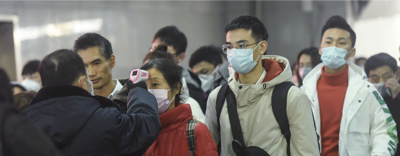

In [8]:
Image.open("content/images/maksssksksss1.png")

In [9]:
with open('content/annotations/maksssksksss0.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

In [10]:
with open('content/labels/maksssksksss0.txt') as f:
    contents = f.read()
    print(contents)

0 0.18359375 0.337431693989071 0.05859375 0.10109289617486339
1 0.4013671875 0.3333333333333333 0.080078125 0.12021857923497267
0 0.6689453125 0.3155737704918033 0.068359375 0.13934426229508196


In [11]:
os.mkdir("content/data/")
os.mkdir('content/data/train')
os.mkdir('content/data/val')
os.mkdir('content/data/test')
os.mkdir('content/data/train/images')
os.mkdir('content/data/train/labels')
os.mkdir('content/data/test/images')
os.mkdir('content/data/test/labels')
os.mkdir('content/data/val/images')
os.mkdir('content/data/val/labels')

In [12]:
metarial = []

for i in os.listdir("content/images"):
    srt = i[:-4]
    metarial.append(srt)

In [13]:
len(metarial)

853

In [14]:
# a few image names of in the dataset
metarial[0:10]

['maksssksksss0',
 'maksssksksss1',
 'maksssksksss10',
 'maksssksksss100',
 'maksssksksss101',
 'maksssksksss102',
 'maksssksksss103',
 'maksssksksss104',
 'maksssksksss105',
 'maksssksksss106']

In [15]:
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    
    for i in range(0,train_size):
        
        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"
        
        mstring = metarial[i]
        train_destination_txt = "content/data/train/labels" + "/" + metarial[i] + ".txt" 
        train_destination_png = "content/data/train/images" + "/" + metarial[i] + ".png" 
                
        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)
                
        #metarial.remove(file_name[:-4])
                
                
    for l in range(train_size , train_size + test_size):
        
        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"
        
        mstring = metarial[l]
        test_destination_txt = "content/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "content/data/test/images" + "/" + metarial[l] + ".png"
                
        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)
                
        #metarial.remove(file_name[:-4])
                
                
    for n in range(train_size + test_size , train_size + test_size + val_size):
        
        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"
        
        mstring = metarial[n]
        val_destination_txt = "content/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "content/data/val/images" + "/" + metarial[n] + ".png"
                
        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)
                
        #metarial.remove(file_name[:-4])

In [16]:
preparinbdata("content/labels", "content/images", 603, 150, 100)

In [17]:
# configure .yaml file to guide the model for training

yaml_text = """train: content/data/train/images
val: content/data/val/images

nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]"""

with open("content/data/data.yaml", 'w') as file:
    file.write(yaml_text)


'cat' is not recognized as an internal or external command,
operable program or batch file.
